# Learning Theory Homework 
***
**Name**: Amruta Rajopadhye



### [15 points] Problem 1: 
***

Consider the class C of concepts defined by triangles with **distinct** vertices of the form $(i, j)$ where $i$ and $j$ are integers in the interval $[0,99]$. A concept c labels points on the interior and boundary of the associated triangle as positive and points exterior to the triangle as negative.

**Note**: To make life easier, we'll allow degenerate triangles in $C$. That is, triangles where the vertices are collinear. The following image depicts an example of a nondegenerate and a degenerate triangle.

**Part A**: Suppose we have an algorithm that produces a consistent $h$ from the hypothesis class $H = C$. Give a bound on the number of training examples sufficient to assure that for any target concept $c$ in $C$, our algorithm will, with probability $1-\delta$, output a hypothesis $h$ with generalization error at most $\epsilon$.

**A**: Notice that there a finite number of concepts in $C$.  In the consistent case we can then use the bound 

$$
m \geq \frac{1}{\epsilon}\left(\ln\left| H \right| + \ln\frac{1}{\delta} \right)
$$

provided that we can calculate the cardinality of $H$. We can define an integer-vertex triangle by choosing any three points out of the complete    
(0-99)x(0-99) grid i.e. 10000 points.
We choose 3 points from 10000 points without replacement.  This is given by 

$$
{{10000}\choose{3}} = 166616670000
$$

$$
\quad \Rightarrow \quad \log\left| H \right| \approx 25.83
$$


Then, our bound becomes 

$$
m \geq \frac{1}{\epsilon}\left(25.83 + \ln\frac{1}{\delta} \right) 
$$

**Part B**: Based on your bound in **Part A**, determine the minimum number of training examples necessary such that for any target concept $c$ in $C$, our algorithm will, with probability $0.95$, output a hypothesis $h$ with generalization error at most $0.15$.  

**A**:
    
With $\epsilon = 0.15$ and $\delta = 0.05$, our bound becomes 

$$
m \geq \frac{1}{0.15}\left(25.83 + \ln\frac{1}{0.05} \right) \approx 192.17
$$

which means we'll achieve our accuracy and confidence goals with $m \geq 193$ training examples. 

### [15 points] Problem 2: 
***

Consider feature vectors that live in two-dimensional space and the class of hypotheses defined by circles **centered at the origin**. There are two different kinds of hypotheses $h$ in this class. One type of hypthesis classifies points as positive if they lie on the boundary or **interior** of the circle, and negative otherwise. The other type of hypothesis classifies points as positive if they lie on the boundary or **exterior** of the circle, and negative otherwise. State and prove (rigorously) the VC dimension of this family of classifiers.

**Lower Bound**

The VC Dimension of this hypothesis class is VCdim(H)=2. We start by showing that we can shatter a configuration of two points.

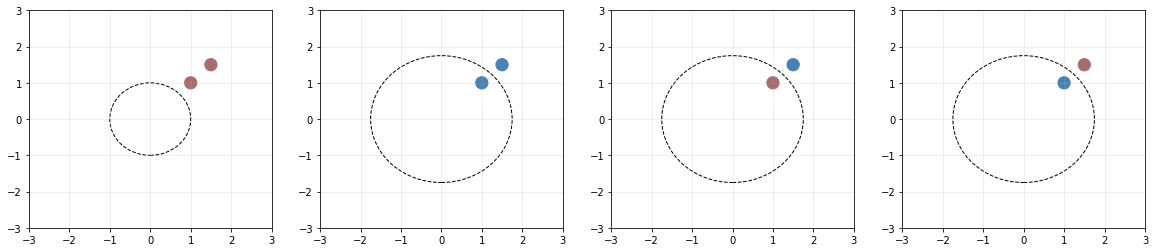

In [99]:
import matplotlib.pylab as plt
from matplotlib.patches import Circle
%matplotlib inline

mycolors = {"blue":"steelblue", "red":"#a76c6e",  "green":"#6a9373", "smoke":"#f2f2f2"}
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
axes[0].scatter([1,1.5], [1,1.5], color=[mycolors["red"], mycolors["red"]], s=150)
axes[0].add_patch(Circle((0, 0), 1, fill=False, ls="--"))
axes[0].set_xlim([-3,3]); axes[0].set_ylim([-3,3]); axes[0].grid(alpha=0.25)

axes[1].scatter([1,1.5], [1,1.5], color=[mycolors["blue"], mycolors["blue"]], s=150)
axes[1].add_patch(Circle((0, 0), 1.75, fill=False, ls="--"))
axes[1].set_xlim([-3,3]); axes[1].set_ylim([-3,3]); axes[1].grid(alpha=0.25)

axes[2].scatter([1,1.5], [1,1.5], color=[mycolors["red"], mycolors["blue"]], s=150)
axes[2].add_patch(Circle((0, 0), 1.75, fill=False, ls="--"))
axes[2].set_xlim([-3,3]); axes[2].set_ylim([-3,3]); axes[2].grid(alpha=0.25)

axes[3].scatter([1,1.5], [1,1.5], color=[mycolors["blue"], mycolors["red"]], s=150)
axes[3].add_patch(Circle((0, 0), 1.75, fill=False, ls="--"))
axes[3].set_xlim([-3,3]); axes[3].set_ylim([-3,3]); axes[3].grid(alpha=0.25)

**Upper Bound**

Now we show that we can't shatter any set of 3 points.<br />
In determining the decision boundary, the only thing matters is the radius of that the point.<br />
Consider three points x1, x2, and x3 with radii r1, r2, and r3.<br />
Without loss of generality, order them such that r1 ≤ r2 ≤ r3.<br />
Our classifier can be defined by the decision rule yk = ht(rk) = 1 if rk ≤ t and −1 otherwise.<br />
Now consider the labeling of the three points such that y1 = +1, y2 = −1, and y3 = +1.<br />
If our classifier captures this dichotomy then we must have both r1≤t and r3≤t since they are positively labeled. This then gives us r1 ≤ r2 ≤ r3 ≤ t.<br />
But this is a contradiction because y2 = −1.<br />
A similar argument shows that the hypothesis yk = ht(rk) = 1 if rk ≥ t and −1 otherwise is insufficient to handle 3 points.<br />
Thus, no collection of 3 points can be shattered.
Hence, VC dimension of origin centered circle is 2

### [20 points] Problem 3: Empirical Verification of PAC Bounds for Axis-Aligned Rectangles 
***

In the in-class notebook associated with PAC Learnability, we proved a PAC bound for the class of concepts $C$ comprised of axis-aligned rectangles living in $\mathbb{R}^2$ of the form $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers. Specifically, we proved that with probability $1-\delta$, any consistent learner could learn a hypothesis $h$ in $H = C$ with generalization error less than $\epsilon$ provided that the number of training examples satisfied 

$$
m > \frac{4}{\epsilon}\log\frac{4}{\delta}
$$

In this problem you will empirically verify this bound for the restricted concept class $C$ where the rectangles are defined by $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers satisfying $0 \leq a \leq b \leq 100$ and $0 \leq c \leq d \leq 100$. 

**Part A**: The following is a general outline of how you should accomplish this, but it is up to you how you organize your code. 

- Write some code that randomly generates a concept rectangle $c$. 



- Write some code that, given feature vectors of length-2, labels them according to some rectangle (that is, labels a point positive if the point is on the boundary or interior of the rectangle, and negative otherwise).  



- Write some code that, given training examples of length-2, and labeled according to a concept $c$, returns a consistent hypothesis rectangle $h$. 



- Write some code that generates a training set of size $m$, labels them according to a random concept $c$, learns a consistent hypothesis $h$, and then approximates the generalization error by predicting on $1000$ new examples from the same distribution as the training data. 


- Write some code that computes approximate generalization errors for $100$ independent concepts $c$ and associated training sets of size $m$, and returns the worst-case generalization error at the confidence level $1-\delta$.  One way to do this in the case that say $\delta = 0.05$, is to report the $95^\textrm{th}$ percentile of the $100$ samples of the generalization error. We can then say that, in our simulation, $100(1-\delta)\%$ of our observed generalization errors were less than our computed value. (**Bonus**: If your code is efficient, try increasing the number of runs in the simulation to $500$. This should give you a better approximation of the generalization error.) 

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# generates concept rectangles
def generate_concept_rect():
    random_1 = np.random.rand(1, 2)*100
    random_2 = np.random.rand(1, 2)*100
    random_1 = sorted(random_1[0])
    random_2 = sorted(random_2[0])
    a = random_1[0]
    b = random_2[0]
    c = random_1[-1]
    d = random_2[-1]
    return (a, b), (c, d), (a, d), (c, b)

# plot the rectangle concept or hypothesis
def plot_rectangle(vtx1, vtx2, marker):
    plt.xlim([0, 100])
    plt.ylim([0, 100])
    width = vtx2[0] - vtx1[0]
    height = vtx2[-1] - vtx1[-1]
    ax = plt.subplot(111)
    ax.add_patch(Rectangle((vtx1[0], vtx1[-1]), width, height, fill=False, color=marker))

# generate random data with uniform distribution
def generate_training_data(num_samples):
    sample_list = []
    for k in range(0, num_samples):
        a = np.random.rand()*100
        b = np.random.rand()*100
        sample_list.append((a, b))
    return sample_list

# generate random data with normal distribution
def generate_normal_training_data(num_samples):
    sample_list = []
    for k in range(0, num_samples):
        a = 25*np.random.randn() + 50
        b = 25*np.random.randn() + 50
        sample_list.append((a, b))
    return sample_list

# label the data according to concept or hypothesis
def label_data_concept(concept, data):
    labeled_training = {}
    for ex in data:
        if concept[0] <= ex[0] <= concept[2]:
            if concept[1] <= ex[-1] <= concept[3]:
                labeled_training[ex] = 1
            else:
                labeled_training[ex] = 0
        else:
            labeled_training[ex] = 0
    return labeled_training

# plot the labelled data
def plot_labelled_training(label_dict):
    x_p = []
    y_p = []
    x_n = []
    y_n = []
    for label in label_dict:
        if label_dict[label] == 1:
            x_p.append(label[0])
            y_p.append(label[-1])
        else:
            x_n.append(label[0])
            y_n.append(label[-1])
    plt.plot(x_p, y_p, 'r.')
    plt.plot(x_n, y_n, 'b.')

# give the hypothesis using positive examples
def give_hypothesis(label_dict):
    x_p = []
    y_p = []
    for label in label_dict:
        if label_dict[label] == 1:
            x_p.append(label[0])
            y_p.append(label[-1])
    if len(x_p) > 0 or len(y_p) > 0:
        x_min = min(x_p)
        x_max = max(x_p)
        y_min = min(y_p)
        y_max = max(y_p)
        return (x_min, y_min), (x_max, y_max), (x_min, y_max), (x_max, y_min)
    else:
        return (0, 0), (0, 0), (0, 0), (0, 0)

# calculate the generalization error
def calculate_gen_error(concept, hypothesis):
    count = 0
    for p in concept:
        if concept[p] != hypothesis[p]:
            count += 1
    return count/len(concept)


c:\users\amruta\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


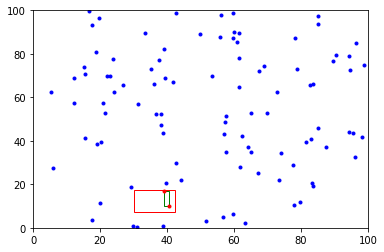

In [101]:
# This block shows an example concept and hypothesis for m=100 and validation samples = 1000

m = 100
vx1, vx2, vx3, vx4 = generate_concept_rect()
plot_rectangle(vx1, vx2, 'r')
training_data = generate_training_data(m)
dict_label = label_data_concept((vx1[0], vx1[-1], vx2[0], vx2[-1]), training_data)
plot_labelled_training(dict_label)
vh1, vh2, vh3, vh4 = give_hypothesis(dict_label)
if vh1 != 'error' or vh2 != 'error' or vh3 != 'error' or vh4 != 'error':
    plot_rectangle(vh1, vh2, 'g')
    # Training is over, hypothesis is created, validate the results
    validation_data = generate_training_data(1000)
    concept_label = label_data_concept((vx1[0], vx1[-1], vx2[0], vx2[-1]), validation_data)
    hypothesis_label = label_data_concept((vh1[0], vh1[-1], vh2[0], vh2[-1]), validation_data)
    error = calculate_gen_error(concept_label, hypothesis_label)
plt.show()
plt.close()

In [102]:
# This code block computes the 95th percentile of generalization error for m =100 and validation samples =1000

m1 = 100
gen_error = []
for i in range(0, 500):
    vx1, vx2, vx3, vx4 = generate_concept_rect()
    training_data = generate_training_data(m1)
    dict_label = label_data_concept((vx1[0], vx1[-1], vx2[0], vx2[-1]), training_data)
    vh1, vh2, vh3, vh4 = give_hypothesis(dict_label)
    validation_data = generate_training_data(1000)
    concept_label = label_data_concept((vx1[0], vx1[-1], vx2[0], vx2[-1]), validation_data)
    hypothesis_label = label_data_concept((vh1[0], vh1[-1], vh2[0], vh2[-1]), validation_data)
    error = calculate_gen_error(concept_label, hypothesis_label)
    gen_error.append(error)
percentile = np.percentile(gen_error, 95)
print('95th percentile of generalization error is {}'.format(percentile))

95th percentile of generalization error is 0.05904999999999995


**Part B**: Use your code to estimate the generalization error with confidence parameter $\delta=0.05$ for training sets of size $m$ where $m = 250, 500, 1000, 1250,$ and $1500$ and the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the continuous uniform distribution $\textrm{unif}(0,100)$. Make a **log-log** plot with $m$ on the horizontal axes and $\epsilon$ on the vertical axis.  Additionally, overlay the theoretical PAC bound on your graph and discuss your results. 

OrderedDict([(250, -3.575550768806933), (500, -4.1351665567423561), (1000, -4.7105307016459177), (1250, -4.8283137373023015), (1500, -5.1076970069393948)])


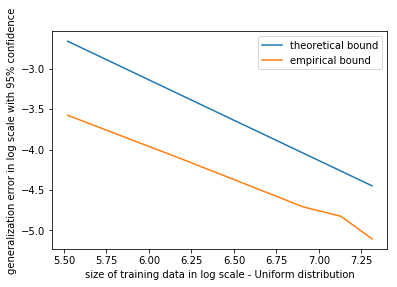

In [103]:
# This code block computes generalization error for given m values over 500 independent concepts, both
# drawn from uniform distribution. 95% confidence is considered.

from collections import OrderedDict
m_list = [250, 500, 1000, 1250, 1500]
gen_error_m = OrderedDict()
for m2 in m_list:
    gen_err1 = []
    for i in range(0, 500):
        vx1, vx2, vx3, vx4 = generate_concept_rect()
        training_data1 = generate_training_data(m2)
        dict_label1 = label_data_concept((vx1[0], vx1[-1], vx2[0], vx2[-1]), training_data1)
        vh1, vh2, vh3, vh4 = give_hypothesis(dict_label1)
        validation_data1 = generate_training_data(1000)
        concept_label1 = label_data_concept((vx1[0], vx1[-1], vx2[0], vx2[-1]), validation_data1)
        hypothesis_label1 = label_data_concept((vh1[0], vh1[-1], vh2[0], vh2[-1]), validation_data1)
        error1 = calculate_gen_error(concept_label1, hypothesis_label1)
        if error1 == 0:
            gen_err1.append(0.000001)
        else:
            gen_err1.append(error1)
    percentile1 = np.percentile(gen_err1, 95)
    gen_error_m[m2] = np.log(percentile1)
print(gen_error_m)
theory_gen = [np.log(17.52/p) for p in m_list]
plt.figure()
m_list = [np.log(m) for m in m_list]
plt.plot(m_list, theory_gen, label='theoretical bound')
plt.plot(m_list, gen_error_m.values(), label='empirical bound')
plt.xlabel('size of training data in log scale - Uniform distribution')
plt.ylabel('generalization error in log scale with 95% confidence')
plt.legend()

The above plot shows that error reduces with increase in number of training examples.

**Part C**: Repeat **Part B** where the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the normal distribution with mean $\mu = 50$ and standard deviation $\sigma = 25$. Again, overlay the theoretical PAC bound on your graph and discuss your results. Do you expect to observe very different results than those observed in **Part B**?  

OrderedDict([(250, -3.5404594489956631), (500, -4.0745419349259206), (1000, -4.7105307016459177), (1250, -4.8283137373023015), (1500, -5.1159958097540823)])


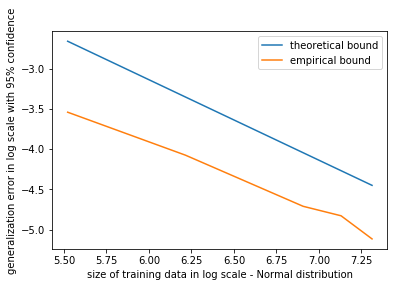

In [104]:
# This code block computes generalization error for given m values over 500 independent concepts, both
# drawn from normal distribution. 95% confidence is considered.

m_list_2 = [250, 500, 1000, 1250, 1500]
gen_error_m_2 = OrderedDict()
for m3 in m_list_2:
    gen_err_2 = []
    for i in range(0, 500):
        vx1, vx2, vx3, vx4 = generate_concept_rect()
        training_data3 = generate_normal_training_data(m3)
        dict_label3 = label_data_concept((vx1[0], vx1[-1], vx2[0], vx2[-1]), training_data3)
        vh1, vh2, vh3, vh4 = give_hypothesis(dict_label3)
        validation_data2 = generate_normal_training_data(1000)
        concept_label3 = label_data_concept((vx1[0], vx1[-1], vx2[0], vx2[-1]), validation_data2)
        hypothesis_label3 = label_data_concept((vh1[0], vh1[-1], vh2[0], vh2[-1]), validation_data2)
        error3 = calculate_gen_error(concept_label3, hypothesis_label3)
        if error3 == 0:
            gen_err_2.append(0.000001)
        else:
            gen_err_2.append(error3)
    percentile3 = np.percentile(gen_err_2, 95)
    gen_error_m_2[m3] = np.log(percentile3)
print(gen_error_m_2)
theory_gen3 = [np.log(17.52/m) for m in m_list_2]
m_list_2 = [np.log(k) for k in m_list_2]
plt.figure()
plt.plot(m_list_2, theory_gen3, label='theoretical bound')
plt.plot(m_list_2, gen_error_m_2.values(), label='empirical bound')
plt.xlabel('size of training data in log scale - Normal distribution')
plt.ylabel('generalization error in log scale with 95% confidence')
plt.legend()
plt.show()
plt.close()

The above plot shows that error reduces with increase in number of training examples. It would seem that the generalization error for normal distribution should be slightly on the higher side, because the training examples are sparse towards the end which lead to unrealiable hypothesis, however, in the majority of the region surrounding the mean, hypothesis will be quite precise, thus, in the end, the error is almost the same within some tolerance